<a href="https://colab.research.google.com/github/lcipolina/Ray/blob/main/3_Ray_RLLIb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Demo of Ray's RLLib

We show how to train a reinforcement learning environment that has been built on top of OpenAI Gym using Ray and RLlib.

Ray Resources

Video Tutorials

https://www.youtube.com/watch?v=Zy_AuL7xLpk&list=PLzTswPQNepXk44l2ElLcxzNTRrlrR95ud

https://www.youtube.com/watch?v=y2KjC7W9nsI&list=PLzTswPQNepXk44l2ElLcxzNTRrlrR95ud&index=4

Implementations:

https://medium.com/distributed-computing-with-ray/intro-to-rllib-example-environments-3a113f532c70

https://opendatascience.com/reinforcement-learning-with-ray-rllib/

https://towardsdatascience.com/ray-and-rllib-for-fast-and-parallel-reinforcement-learning-6d31ee21c96c

https://github.com/anyscale/academy/tree/64b5b7d149d1dfd3883948bbde0a247b57fbef0c

https://docs.ray.io/en/master/auto_examples/plot_pong_example.html

https://arxiv.org/pdf/1712.09381.pdf


## Ray and RLLib Overview

RLLIb is basically a library with RL algos and other RL features that are specifically designed to work well with RAY.

It comes with some RL common algos already implemented for you.

Or you can build your own.. similar to GYM’s environment

It has of course, integration with GYM, so one can call GYM’s envs and all its features.

**List of Algos supported**

https://docs.ray.io/en/releases-0.8.6/rllib-algorithms.html

**How to Install**

https://docs.ray.io/en/releases-0.8.6/installation.html 


In [10]:
# Importing the usuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torch
import sklearn

# just to display my images
import cv2  
from google.colab.patches import cv2_imshow
import os

In [ ]:
# Gym RL algos will be running under the hood
!pip install gym
import gym

Rendering Gym in Colab

https://stackoverflow.com/questions/50107530/how-to-render-openai-gym-in-google-colab

https://colab.research.google.com/drive/16gZuQlwxmxR5ZWYLZvBeq3bTdFfb1r_6

In [12]:
# Install virtual display for Colab (to render the game)
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

!pip install pygame

from gym.utils.play import play
from IPython import display as ipythondisplay  


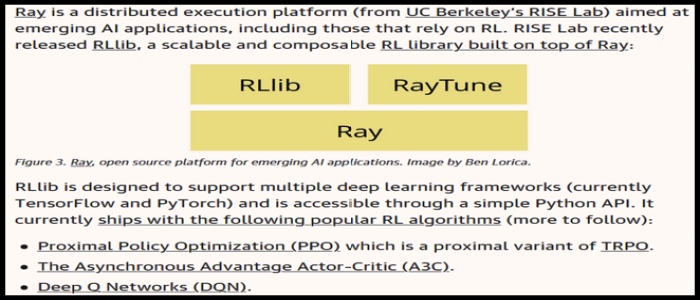

In [3]:
!curl -sS https://i.imgur.com/jB5d6mZ.png > kp.jpg 
img= cv2.imread("kp.jpg")
img= cv2.resize(img, (700,300), interpolation = cv2.INTER_AREA)
cv2_imshow(img)

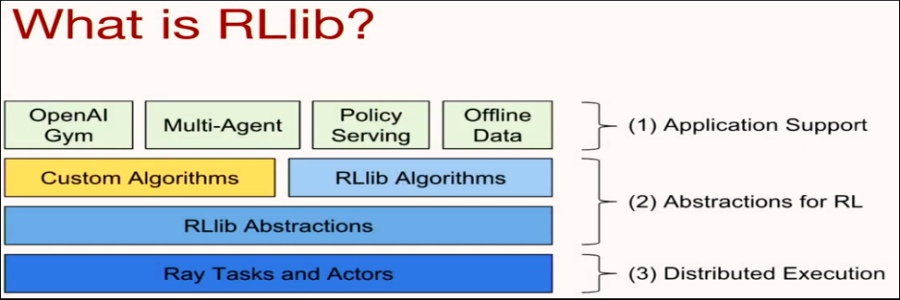

In [4]:
!curl -sS https://i.imgur.com/jTSW7va.png > kp.jpg 
img= cv2.imread("kp.jpg")
img= cv2.resize(img, (900,300), interpolation = cv2.INTER_AREA)
cv2_imshow(img)

### RLLib in Ray
Ray comes with many popular DRL models already coded (they are wrapped from Gym), so we are using a “packaged” PPO from RLLIB, we don’t have to code anything ourselves.

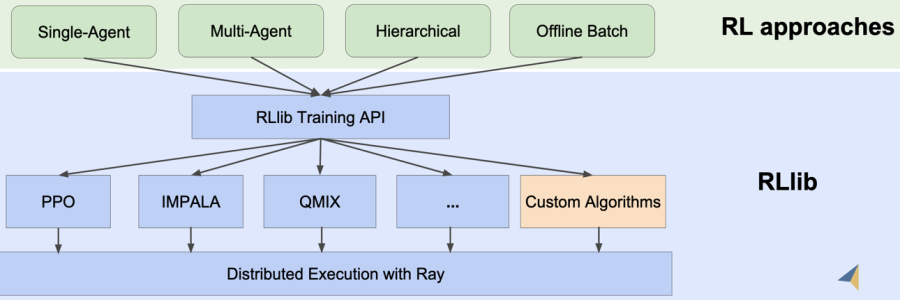

In [5]:
!curl -sS https://i.imgur.com/bNMNJFd.png > kp.jpg 
img= cv2.imread("kp.jpg")
img= cv2.resize(img, (900,300), interpolation = cv2.INTER_AREA)
cv2_imshow(img)

## Cart Pole with RLLIB - PPO

Video examples of Cartpole in RLLIB:

Example without Tune and without cluster

https://www.youtube.com/watch?v=8tG8PJC6oaU

Example with Tune

https://www.youtube.com/watch?v=y2KjC7W9nsI&list=PLzTswPQNepXk44l2ElLcxzNTRrlrR95ud&index=4



Code implementations:

https://github.com/anyscale/academy/blob/64b5b7d149d1dfd3883948bbde0a247b57fbef0c/ray-rllib/explore-rllib/01-Application-Cart-Pole.ipynb

https://medium.com/distributed-computing-with-ray/intro-to-rllib-example-environments-3a113f532c70

https://www.codeproject.com/Articles/5271939/Cartpole-The-Hello-World-of-Reinforcement-Learning

In [ ]:
!pip install ray[rllib]
!pip install 'ray[default]'

Define directory for checkpoints

In [14]:
import shutil

#Main saving directory
CHECKPOINT_ROOT = "tmp/ppo/cart"

# Where checkpoints are written:
shutil.rmtree(CHECKPOINT_ROOT, ignore_errors=True, onerror=None)

# Where some data will be written and used by Tensorboard below:
ray_results = os.getenv("HOME") + "/ray_results/"
shutil.rmtree(ray_results, ignore_errors=True, onerror=None)

### Initializing Ray for laptop use (without cluster)

In the Ray initialization command is where we define the parallelization

In [15]:
import ray
import ray.rllib.agents.ppo as ppo

ray.shutdown()
ray.init(ignore_reinit_error=True)

#NOTE: It prints the dashboard running on a local port

2021-08-12 18:38:22,442	INFO services.py:1247 -- View the Ray dashboard at http://127.0.0.1:8265


{'metrics_export_port': 62437,
 'node_id': '4240b3e55633580b684244d01110a65347dbc85a06cb1703539b933b',
 'node_ip_address': '172.28.0.2',
 'object_store_address': '/tmp/ray/session_2021-08-12_18-38-18_935356_747/sockets/plasma_store',
 'raylet_ip_address': '172.28.0.2',
 'raylet_socket_name': '/tmp/ray/session_2021-08-12_18-38-18_935356_747/sockets/raylet',
 'redis_address': '172.28.0.2:6379',
 'session_dir': '/tmp/ray/session_2021-08-12_18-38-18_935356_747',
 'webui_url': '127.0.0.1:8265'}

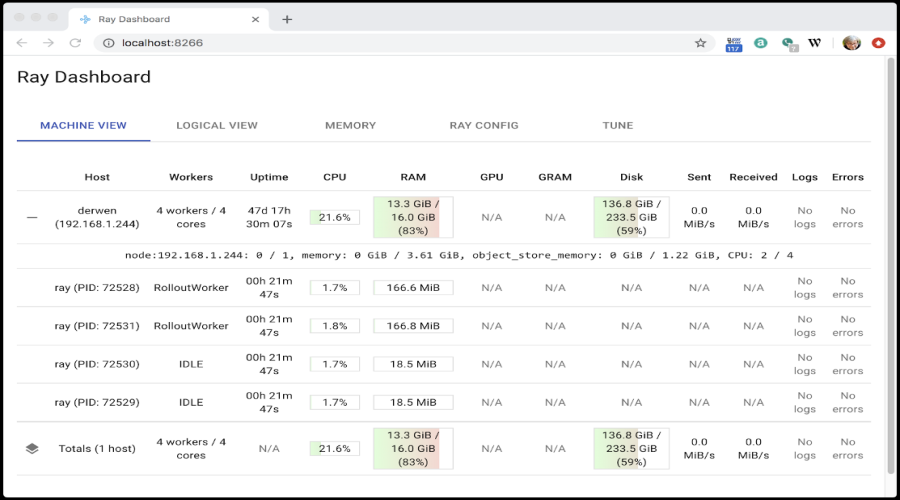

In [8]:
!curl -sS https://i.imgur.com/VyEW7RX.png> kp.jpg 
img= cv2.imread("kp.jpg")
img= cv2.resize(img, (900,500), interpolation = cv2.INTER_AREA)
cv2_imshow(img)

### Configuration
Train a policy with PPO
Similar to training a Gym env

In [17]:
# Configuration
SELECT_ENV = "CartPole-v1"                      # Specifies the OpenAI Gym environment for Cart Pole

config = ppo.DEFAULT_CONFIG.copy()              # PPO's default configuration. See the next code cell.
config["log_level"] = "WARN"                    # Suppress too many messages, but try "INFO" to see what can be printed.

agent = ppo.PPOTrainer(config, env=SELECT_ENV)

2021-08-12 18:41:09,896	INFO trainer.py:706 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-08-12 18:41:09,903	INFO trainer.py:720 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-08-12 18:41:26,526	INFO trainable.py:109 -- Trainable.setup took 16.632 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-08-12 18:41:26,529	WARNING util.py:55 -- Install gputil for GPU system monitoring.


In [18]:
# We can check current configuration
ppo.DEFAULT_CONFIG

{'_fake_gpus': False,
 'action_space': None,
 'actions_in_input_normalized': False,
 'batch_mode': 'truncate_episodes',
 'callbacks': ray.rllib.agents.callbacks.DefaultCallbacks,
 'clip_actions': False,
 'clip_param': 0.3,
 'clip_rewards': None,
 'collect_metrics_timeout': 180,
 'compress_observations': False,
 'create_env_on_driver': False,
 'custom_eval_function': None,
 'custom_resources_per_worker': {},
 'eager_tracing': False,
 'entropy_coeff': 0.0,
 'entropy_coeff_schedule': None,
 'env': None,
 'env_config': {},
 'env_task_fn': None,
 'evaluation_config': {},
 'evaluation_interval': None,
 'evaluation_num_episodes': 10,
 'evaluation_num_workers': 0,
 'evaluation_parallel_to_training': False,
 'exploration_config': {'type': 'StochasticSampling'},
 'explore': True,
 'extra_python_environs_for_driver': {},
 'extra_python_environs_for_worker': {},
 'fake_sampler': False,
 'framework': 'tf',
 'gamma': 0.99,
 'grad_clip': None,
 'horizon': None,
 'ignore_worker_failures': False,
 'in_

### Training
Results are saved at: root/ray_results

In [10]:
# Training
N_ITER = 5  #only 5 iterations to show the idea
s = "{:3d} reward {:6.2f}/{:6.2f}/{:6.2f} len {:6.2f} saved {}"

for n in range(N_ITER):
  result = agent.train()
  file_name = agent.save(CHECKPOINT_ROOT)

  print(s.format(
    n + 1,
    result["episode_reward_min"],
    result["episode_reward_mean"],
    result["episode_reward_max"],
    result["episode_len_mean"],
    file_name
   ))

  1 reward   9.00/ 41.22/187.00 len  41.22 saved tmp/ppo/cart/checkpoint_000002/checkpoint-2
  2 reward  10.00/ 64.78/283.00 len  64.78 saved tmp/ppo/cart/checkpoint_000003/checkpoint-3
  3 reward  11.00/101.04/414.00 len 101.04 saved tmp/ppo/cart/checkpoint_000004/checkpoint-4
  4 reward  11.00/132.90/500.00 len 132.90 saved tmp/ppo/cart/checkpoint_000005/checkpoint-5
  5 reward  11.00/167.49/500.00 len 167.49 saved tmp/ppo/cart/checkpoint_000006/checkpoint-6


### Tensorboard results
Note: one can also use WandB

In [12]:
#From command line:
#tensorboard - logdir=$HOME/ray_results/

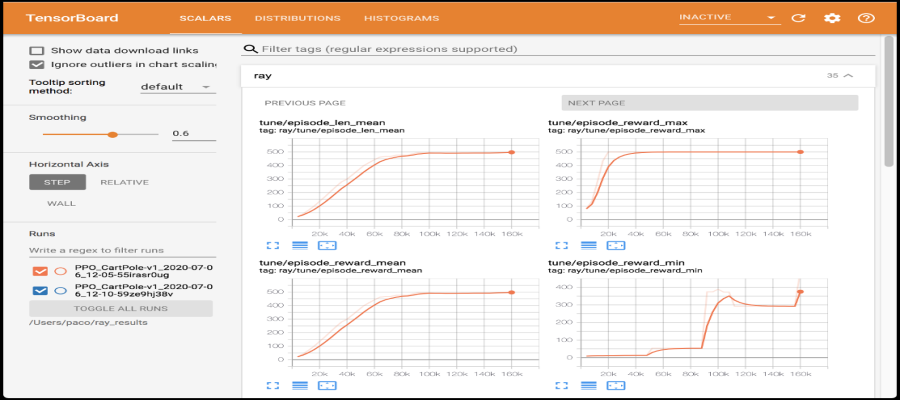

In [3]:
!curl -sS https://i.imgur.com/Dow9SJl.png > kp.jpg 
img= cv2.imread("kp.jpg")
img= cv2.resize(img, (900,400), interpolation = cv2.INTER_AREA)
cv2_imshow(img)

## Analyze Policy


In [8]:
policy = agent.get_policy()
model = policy.model
print(model.base_model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observations (InputLayer)       [(None, 4)]          0                                            
__________________________________________________________________________________________________
fc_1 (Dense)                    (None, 256)          1280        observations[0][0]               
__________________________________________________________________________________________________
fc_value_1 (Dense)              (None, 256)          1280        observations[0][0]               
__________________________________________________________________________________________________
fc_2 (Dense)                    (None, 256)          65792       fc_1[0][0]                       
______________________________________________________________________________________________

### Model Rollout
Once we have trained a policy, we deploy it in the environment

WARNING: The rllib rollout command discussed next won't work in a cloud environment, because it attempts to pop up a window.


https://docs.ray.io/en/latest/rllib-concepts.html#policy-evaluation


From command line

In [ ]:
 rllib rollout \
 tmp/ppo/cart/checkpoint_40/checkpoint-40 \
 - config "{\"env\": \"CartPole-v1\"}" \
 - run PPO \
 - steps 2000

## Ray Paralellization

https://github.com/anyscale/academy/blob/64b5b7d149d1dfd3883948bbde0a247b57fbef0c/ray-rllib/explore-rllib/01-Application-Cart-Pole.ipynb

RAY basically triggers several ROLLOUTS (i.e. episodes) at the same time (by distributing it to many “WORKERS”) so the whole thing runs faster.

### Parallelization concepts:
num_workers sets the number of CPU processors for parallelization.

num_cpus_per_worker when set to 0 prevents Ray from pinning a CPU core to each worker, which means we could run out of workers in a constrained environment like a laptop or a cloud VM.

## Next Steps:
Custom Gym environments and RLLIB

https://medium.com/distributed-computing-with-ray/anatomy-of-a-custom-environment-for-rllib-327157f269e5

https://developpaper.com/ray-and-rllib-for-fast-parallel-reinforcement-learning/

https://towardsdatascience.com/ray-and-rllib-for-fast-and-parallel-reinforcement-learning-6d31ee21c96c

Example of custom environments and reward shaping

https://colab.research.google.com/github/valin1/rllib-tutorial/blob/master/RLlib_Tutorial.ipynb

https://colab.research.google.com/github/ray-project/tutorial/blob/master/rllib_exercises/rllib_colab.ipynb